# Satisfação do Consumidor - Santander

O Projeto consiste na análise satisfação do consumidor quanto ao uso dos serviços santander.

In [1]:
# Importando Pacotes dos quais serão utilizados muitos recursos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plotando o gráfico em sua respectiva célula
%matplotlib inline

In [2]:
# Carregando dataset de treino e teste
Santander_Train = pd.read_csv("train.csv")
Santander_Test = pd.read_csv("test.csv")

In [3]:
# Visualizando os datasets
# Treino
Santander_Train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
# Teste
Santander_Test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [5]:
# O tipo de dado das colunas (todos numéricos)
Santander_Train.dtypes

ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object

In [6]:
# Quantidade de linhas e colunas
Santander_Train.shape

(76020, 371)

In [7]:
# Quantidade de linhas e colunas
Santander_Test.shape

(75818, 370)

In [8]:
# descrição dos dados
Santander_Train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [9]:
# Verificando se existem valores NA
df_false_true = Santander_Train.isna()
any(df_false_true.apply(any, axis = 0))

False

In [10]:
# Contando números zero
zeros = (Santander_Train == 0).sum(axis = 0)
zeros

ID                             0
var3                          75
var15                          0
imp_ent_var16_ult1         72301
imp_op_var39_comer_ult1    66075
                           ...  
saldo_medio_var44_hace3    75988
saldo_medio_var44_ult1     75879
saldo_medio_var44_ult3     75879
var38                          0
TARGET                     73012
Length: 371, dtype: int64

In [11]:
# Total de zeros na tabela
total_zeros = sum(zeros)

# Total de números
total_numeros = sum(Santander_Train.count(axis = 0))

# porcentagem de zeros
total_zeros/total_numeros

0.906704364222495

A porcentagem de zeros em comparação com a quantidade total de números do dataframe é de 90%.
Nesse caso, o dataframe pode ser considerado esparso. Vamos aplicar uma técnica de padronizção que também lida com data sets esparsos.

In [12]:
# Calculaando as correlações
correlation = Santander_Train.corr()

In [13]:
# Correlação com a variável TARGET
corr_TARGET = correlation.loc["TARGET",:]

In [14]:
corr_TARGET_notNA = corr_TARGET.sort_values(ascending=False).dropna()
corr_TARGET_notNA[abs(corr_TARGET_notNA) >= 0.1]

TARGET                 1.000000
var36                  0.102919
var15                  0.101322
num_var5              -0.134095
ind_var5              -0.135349
num_var42             -0.135693
num_var30             -0.138289
num_meses_var5_ult3   -0.148253
ind_var30             -0.149811
Name: TARGET, dtype: float64

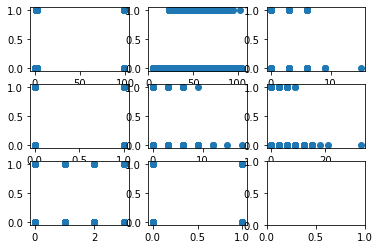

In [15]:
# Plotando gráficos das varáveis com maiores correlações
fig, ax = plt.subplots(3,3)

var_target = Santander_Train.loc[:,"TARGET"]

var36 = Santander_Train.loc[:,"var36"]
var15 = Santander_Train.loc[:,"var15"]
num_var5 = Santander_Train.loc[:,"num_var5"]
ind_var5 = Santander_Train.loc[:,"ind_var5"]
num_var42 = Santander_Train.loc[:,"num_var42"]
num_var30 = Santander_Train.loc[:,"num_var30"]
num_meses_var5_ult3 = Santander_Train.loc[:,"num_meses_var5_ult3"]
ind_var30 = Santander_Train.loc[:,"ind_var30"]

ax[0,0].scatter(var36, var_target)
ax[0,1].scatter(var15, var_target)
ax[0,2].scatter(num_var5, var_target)
ax[1,0].scatter(ind_var5, var_target)
ax[1,1].scatter(num_var42, var_target)
ax[1,2].scatter(num_var30, var_target)
ax[2,0].scatter(num_meses_var5_ult3, var_target)
ax[2,1].scatter(ind_var30, var_target)

plt.show()

In [16]:
# Variáveis coma mais valores únicos (exceto ID)
Quant_Uniq = Santander_Train.apply(set, axis=0).map(len)
quantitative_var = Quant_Uniq[Quant_Uniq > 200].sort_values(ascending = False).head(10)
quantitative_var

ID                         76020
var38                      57736
saldo_medio_var5_ult3      17330
saldo_var30                16940
saldo_var42                15730
saldo_medio_var5_ult1      14778
saldo_medio_var5_hace2     14486
saldo_var5                 11642
imp_op_var39_comer_ult3     9099
imp_op_var41_comer_ult3     8961
dtype: int64

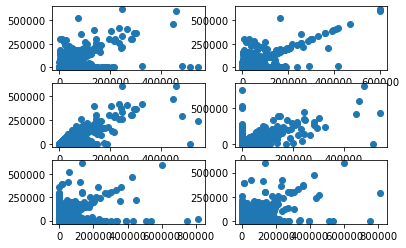

In [17]:
# Gráfico entre algumas variáveis
fig, ax = plt.subplots(3,2)

var38 = Santander_Train.loc[:,"var38"]

saldo_medio_var5_ult3 = Santander_Train.loc[:,"saldo_medio_var5_ult3"]
saldo_var5 = Santander_Train.loc[:,"saldo_var5"]
saldo_medio_var5_ult1 = Santander_Train.loc[:,"saldo_medio_var5_ult1"]
saldo_medio_var5_hace2 = Santander_Train.loc[:,"saldo_medio_var5_hace2"]

ax[0,0].scatter(saldo_medio_var5_ult3, saldo_var5)
ax[0,1].scatter(saldo_medio_var5_ult1, saldo_var5)
ax[2,0].scatter(saldo_medio_var5_hace2, saldo_var5)
ax[1,0].scatter(saldo_medio_var5_ult3, saldo_medio_var5_ult1)
ax[1,1].scatter(saldo_medio_var5_ult3, saldo_medio_var5_hace2)
ax[2,1].scatter(saldo_medio_var5_hace2, saldo_medio_var5_ult1)

plt.show()

num 0: 73012.00
num 1: 3008.00


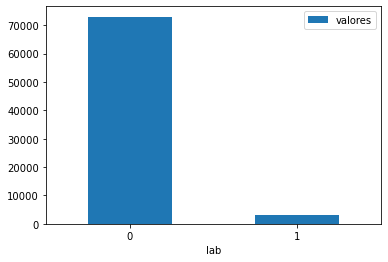

In [18]:
# Quantidade de cada classe

y = (Santander_Train.TARGET == 0).sum()
x = (Santander_Train.TARGET == 1).sum()

lab = [0, 1]
val = [y, x]

df = pd.DataFrame({"lab":lab, "valores":val})

df.plot.bar(x = "lab", y = "valores", rot=0)

print("num 0: %0.2f\nnum 1: %0.2f" %(y, x))

In [19]:
# Aplicando a técnica de padronização
# Aplicamos a técnica de padronização com parâmetro with_mean=False, pois o data set é esparso.
# Data set em formatos CSR e CCS podem ser padrozizados sem que essa estrutura de compressão seja
# prejudicada.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_Train = Santander_Train.iloc[:,0:370]
y_Train = Santander_Train.iloc[:,370]

# Data set de teste
X_Test = Santander_Test

# Aplicando a padronização
scaler = scaler.fit(X_Train)
df_Standarded = scaler.transform(X_Train)

# Aplicando as transformações aos dados de teste
df_Stand_test = scaler.transform(X_Test)

In [21]:
# Mostrando os dados padronizados
df_Standarded[0:5,:]

array([[2.28406144e-05, 5.12384255e-05, 1.77518438e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.14630685e-01],
       [6.85218432e-05, 5.12384255e-05, 2.62418561e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.69775066e-01],
       [9.13624576e-05, 5.12384255e-05, 1.77518438e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.68622127e-01],
       [1.82724915e-04, 5.12384255e-05, 2.85573140e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.50414867e-01],
       [2.28406144e-04, 5.12384255e-05, 3.01009526e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.42224884e-01]])

In [22]:
# O formato do array
df_Standarded.shape

(76020, 370)

In [23]:
# Aplicando a técnica de redução de dimensionalidade do data set
# Para data sets esparsos, o ideal seria a utilização do algoritmo IPCA, mas utilizamos o PCA.
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
pca = pca.fit(df_Standarded)
df_pca = pca.transform(df_Standarded)

# Aplicando as transformações aos dados de teste
df_pca_test = pca.transform(df_Stand_test)

In [24]:
# Criando o dataframe com os dados PCA
df_Train_pca = pd.DataFrame(df_pca, columns=["col1","col2",
                             "col3","col4",
                             "col5","col6",
                             "col7","col8"])

# Criando dataframe de teste com os dados PCA
df_Test_pca = pd.DataFrame(df_pca_test, columns=["col1","col2",
                             "col3","col4",
                             "col5","col6",
                             "col7","col8"])

In [25]:
# Data set com 8 colunas e 76020 registros
df_Train_pca.count()

col1    76020
col2    76020
col3    76020
col4    76020
col5    76020
col6    76020
col7    76020
col8    76020
dtype: int64

In [26]:
# As 5 primeiras linhas do data set
df_Train_pca.head()

,col1,col2,col3,col4,col5,col6,col7,col8
0,-2.671795,-1.554486,-0.220259,0.267512,0.153192,1.353934,0.160462,-0.109370
1,-0.957959,7.752778,-4.194069,5.221495,2.477700,0.254007,0.131921,0.081344
2,-1.983010,-0.933886,0.012823,-0.084887,0.113459,-0.155143,0.019536,-0.112428
3,4.445355,-1.455413,0.072351,-0.081794,-0.197027,-2.799990,-0.386871,0.125479
4,2.083534,8.543038,4.088579,-10.281934,-5.907585,1.589592,-0.250864,0.775683


In [27]:
# Concatenando com a variável target
df_Train_pca = pd.concat([df_Train_pca, y_Train], axis=1)
df_Train_pca = df_Train_pca.iloc[:,0:9]
df_Train_pca

,col1,col2,col3,col4,col5,col6,col7,col8,TARGET
0,-2.671795,-1.554486,-0.220259,0.267512,0.153192,1.353934,0.160462,-0.109370,0
1,-0.957959,7.752778,-4.194069,5.221495,2.477700,0.254007,0.131921,0.081344,0
2,-1.983010,-0.933886,0.012823,-0.084887,0.113459,-0.155143,0.019536,-0.112428,0
3,4.445355,-1.455413,0.072351,-0.081794,-0.197027,-2.799990,-0.386871,0.125479,0
4,2.083534,8.543038,4.088579,-10.281934,-5.907585,1.589592,-0.250864,0.775683,0
...,...,...,...,...,...,...,...,...,...
76015,-2.580238,-1.388228,-0.212370,0.281523,0.138958,1.369150,0.152837,-0.101351,0
76016,1.753481,7.114888,2.928036,-8.049218,-4.696881,1.385722,-0.209432,0.803343,0
76017,-2.001279,-0.957079,-0.004676,-0.062202,0.101325,-0.062004,0.018645,-0.112794,0
76018,-1.932655,-0.889418,0.007888,-0.098427,0.112179,-0.213095,0.007495,-0.126947,0


## Validação Cruzada (cross-validation)

Essa técnica é utilizada para avaliar a capacidade de generalização do modelo. Existem 3 principais métodos:

1. Holdout
    * Consiste na técnica de separar o conjunto de dados em dois subconjuntos mutuamente excludentes, a saber, um para estimação de parâmetro e outro para validação. Após essa separação, os modelo são testados e, então, é possível avaliar a capacidade de generalização do modelo. As divisões são normalmente 1/3 para validação e 2/3 para estimação. Utilizado para conjuntos de dados muito grandes.

2. K-fold
    * Nesta técnica, os dados são divididos em k subconjuntos de dados dos quais 1 é separado para validação e o restante (k-1) para estimação. São separados k conjuntos de estimação e k conjuntos de validação, ou seja, k parâmetros de performnce do modelo.

3. Leave one-out
    * Esta técnica é uma consequência do k-fold onde k é igual ao número de registros do data set. Esta técnica demanda uma capacidade computacional muito maior.

In [28]:
# Separando dados de treino e teste (holdout)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_Train_pca.iloc[:,0:8], df_Train_pca.TARGET, 
                                                    test_size=0.33, random_state=0)

In [29]:
# Treinando modelos de machine learning (Adaboost)
from sklearn.ensemble import GradientBoostingClassifier

x_teste = df_Test_pca

# Criando o objeto Gradient Boosting 
modelo = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state = 0)

# Treinando o modelo com dados de treino 
modelo = modelo.fit(X_train, y_train)

# Previsões
# valores_previstos = modelo.predict(x_teste)

### Métricas para Classificadores

* Recall:

$\frac{t_p}{t_p + f_n}$ onde $t_p$ é o número de verdadeiro positivo e $f_n$ o número de falso negativo.
O recall mede o quanto os positivos foram classificados corretamente em comparação com todos os valores que foram classificados  como positivos corretamentd e os valores que foram classificados erradamente como negativos (valores que deveriam ser classificados como positivo). Ele mede a habilidade do classificador encontrar todas as amostras positivas.

* Precision:

$\frac{t_p}{t_p + f_p}$ onde $t_p$ é o número de verdadeiro positivo e $f_p$ o número de falso positivo.
O precision mede o quanto os positivos foram classificados corretamente em comparação com todos que foram classificados como positivo (os classificados corretamente e erradamente como positivos). Ele mede a habilidade do classificador classificar como positivo uma amostra que é negativa.

* Accuracy:

$\frac{t_p + t_n}{t_p + f_p + f_n + t_n}$ onde $t_p$ é o número de verdadeiro positivo, $f_p$ o número de falso positivo, $f_n$ o número de falso negativo e $t_n$ o numero de verdadeiro negativo. Essa métrica mede o quanto o classificador consegue classificar corretamente as amostras positivas e negativas.

In [30]:
# Avaliando métricas de classificação
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

y_test_pred = modelo.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)

recall = recall_score(y_test, y_test_pred)

roc = roc_auc_score(y_test, y_test_pred)

print("accuracy: %0.5f \nprecision: %0.5f \nrecall: %0.5f\nroc: %0.5f" %(accuracy, precision, recall, roc))

accuracy: 0.96010 
precision: 0.00000 
recall: 0.00000
roc: 0.49998


In [31]:
# Métricas de classificação
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     24087
           1       0.00      0.00      0.00      1000

    accuracy                           0.96     25087
   macro avg       0.48      0.50      0.49     25087
weighted avg       0.92      0.96      0.94     25087



In [32]:
# Cross Table
print (pd.crosstab(y_test, y_test_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0  1    All
Real                    
0        24086  1  24087
1         1000  0   1000
All      25086  1  25087


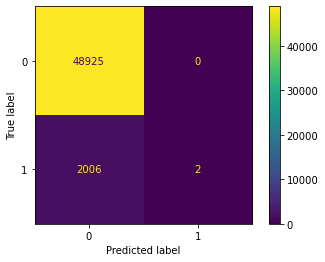

In [33]:
# Matriz de confusão
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelo, X_train, y_train)

In [34]:
# Usando a técnica k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

k_fold = KFold(n_splits=4)

X_train_fold = df_Train_pca.iloc[:,0:8]
y_train_fold = df_Train_pca.TARGET

modelo_new = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, 
                                        max_depth = 1, random_state = 0)

scores_accuracy = cross_val_score(modelo_new, X_train_fold, y_train_fold, scoring="accuracy")
scores_precision = cross_val_score(modelo_new, X_train_fold, y_train_fold, scoring="precision")
scores_recall = cross_val_score(modelo_new, X_train_fold, y_train_fold, scoring="recall")

print("accuracy mean: %0.3f\naccuracy std: %0.3f\n\n" %(scores_accuracy.mean(), scores_accuracy.std()))
print("precision mean: %0.3f\npresicion std: %0.3f\n\n" %(scores_precision.mean(), scores_precision.std()))
print("recall mean: %0.3f\nrecall std: %0.3f\n" %(scores_recall.mean(), scores_recall.std()))

accuracy mean: 0.960
accuracy std: 0.000


precision mean: 0.000
presicion std: 0.000


recall mean: 0.000
recall std: 0.000



In [35]:
# Balanceamento de dados (imbalanced-learn)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_res, y_res = smote.fit_resample(X_train_fold, y_train_fold)

In [36]:
# Data set balanceado
df_balanced = pd.concat([X_res, y_res], axis=1)

num 0: 73012.00
num 1: 73012.00


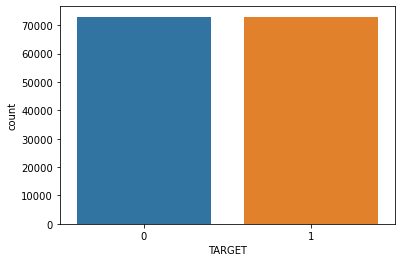

In [36]:
import seaborn as sns

sns.countplot("TARGET", data=df_balanced)

zeros_balan = (df_balanced.TARGET == 0).sum()
ones_balan = (df_balanced.TARGET == 1).sum()

print("num 0: %0.2f\nnum 1: %0.2f" %(zeros_balan, ones_balan))

In [37]:
# view dados
df_balanced.head()

,col1,col2,col3,col4,col5,col6,col7,col8,TARGET
0,-2.671795,-1.554486,-0.220259,0.267512,0.153192,1.353934,0.160462,-0.109370,0
1,-0.957959,7.752778,-4.194069,5.221495,2.477700,0.254007,0.131921,0.081344,0
2,-1.983010,-0.933886,0.012823,-0.084887,0.113459,-0.155143,0.019536,-0.112428,0
3,4.445355,-1.455413,0.072351,-0.081794,-0.197027,-2.799990,-0.386871,0.125479,0
4,2.083534,8.543038,4.088579,-10.281934,-5.907585,1.589592,-0.250864,0.775683,0


In [38]:
# Separando dados de treino e teste (método holdout)
from sklearn.model_selection import train_test_split

X_train_balanced = df_balanced.iloc[:,0:8]
y_train_balanced = df_balanced.TARGET

X_train_balanc, X_test_balanc, y_train_balanc, y_test_balanc = train_test_split(X_train_balanced, 
                                                                                y_train_balanced, 
                                                                                test_size=0.33, 
                                                                                random_state=0)

In [39]:
# Criando novos modelos com os dados balanceados

# Treinando modelos de machine learning (Adaboost)
from sklearn.ensemble import GradientBoostingClassifier

# Criando o objeto Gradient Boosting 
modelo_balanced = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, 
                                             max_depth = 1, random_state = 0)

# Treinando o modelo com dados de treino 
modelo_balanced = modelo_balanced.fit(X_train_balanced, y_train_balanced)

# score
modelo_balanced.score(X_test_balanc, y_test_balanc)

0.727380260645804

In [40]:
# Métricas
y_pred_balanc = modelo_balanced.predict(X_test_balanc)

accuracy = accuracy_score(y_test_balanc, y_pred_balanc)

precision = precision_score(y_test_balanc, y_pred_balanc)

recall = recall_score(y_test_balanc, y_pred_balanc)

roc = roc_auc_score(y_test_balanc, y_pred_balanc)

print("accuracy: %0.5f \nprecision: %0.5f \nrecall: %0.5f\nroc: %0.5f" %(accuracy, precision, recall, roc))

accuracy: 0.72738 
precision: 0.73588 
recall: 0.71323
roc: 0.72745


In [41]:
# Métricas de classificação
from sklearn.metrics import classification_report

print(classification_report(y_test_balanc, y_pred_balanc))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73     23984
           1       0.74      0.71      0.72     24204

    accuracy                           0.73     48188
   macro avg       0.73      0.73      0.73     48188
weighted avg       0.73      0.73      0.73     48188



In [42]:
# Cross Table
print (pd.crosstab(y_test_balanc, y_pred_balanc, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0      1    All
Real                        
0        17788   6196  23984
1         6941  17263  24204
All      24729  23459  48188


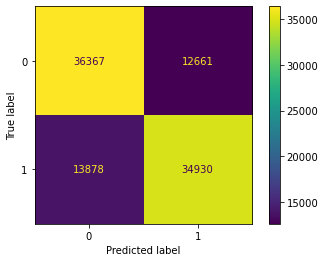

In [43]:
# Matriz de confusão
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelo_balanced, X_train_balanc, y_train_balanc)

In [45]:
# Aplicando a técnica k-fold

modelo_balanced_new = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, 
                                             max_depth = 1, random_state = 0)

np.random.seed(0)
scores_accuracy = cross_val_score(modelo_balanced_new, X_train_balanced, y_train_balanced, 
                                  scoring="accuracy")
scores_precision = cross_val_score(modelo_balanced_new, X_train_balanced, y_train_balanced, 
                                   scoring="precision")
scores_recall = cross_val_score(modelo_balanced_new, X_train_balanced, y_train_balanced, 
                                scoring="recall")

print("accuracy mean: %0.3f\naccuracy std: %0.3f\n\n" %(scores_accuracy.mean(), scores_accuracy.std()))
print("precision mean: %0.3f\npresicion std: %0.3f\n\n" %(scores_precision.mean(), scores_precision.std()))
print("recall mean: %0.3f\nrecall std: %0.3f\n" %(scores_recall.mean(), scores_recall.std()))

accuracy mean: 0.717
accuracy std: 0.017


precision mean: 0.722
presicion std: 0.024


recall mean: 0.709
recall std: 0.009



## Ajuste de Variáveis

A performance do modelo após o balanceamento dos dados de aproximadamente 0.7 para as métricas de acurácia, precisão e recall. Escolhemos fazer alguns ajustes de parãmetros para melhorar a performance do modelo Gradient Boosting. Usamos como referência o seguinte site:

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [48]:
# Ajuste de Parâmetros (n_estimators)
# Primeiro foi feito um ajuste com n_estimators variando de 20 a 80
# Como o best_estimator foi 80, tentamos com valores mais altos (80 até 100 de 10 em 10) e 
# obtivemos o melhor estimator igual a 100
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[100, 200]}

rf = GradientBoostingClassifier(learning_rate=0.2, min_samples_split=700,
                                            min_samples_leaf=100,max_depth=7,max_features='sqrt',
                                            subsample=0.8,random_state=0)

search1 = GridSearchCV(rf, param_grid, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

search1.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  max_depth=7,
                                                  max_features='sqrt',
                                                  min_samples_leaf=100,
                                                  min_samples_split=700,
                                                  random_state=0,
                                                  subsample=0.8),
             iid=False, n_jobs=4, param_grid={'n_estimators': [100, 200]},
             scoring='roc_auc')

In [49]:
# Resultado dos testes
search1.best_params_, search1.best_score_, search1.best_index_

({'n_estimators': 200}, 0.8055471162427794, 1)

In [50]:
# Ajustando max_depth e min_samples_split
param_test2 = {'max_depth':range(5,16,5), 'min_samples_split':range(200,1001,400)}

gbc = GradientBoostingClassifier(learning_rate=0.2, min_samples_split=700,
                                            min_samples_leaf=100,max_depth=7,max_features='sqrt',
                                            subsample=0.8,random_state=0, n_estimators=200)

search2 = GridSearchCV(gbc, param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

search2.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  max_depth=7,
                                                  max_features='sqrt',
                                                  min_samples_leaf=100,
                                                  min_samples_split=700,
                                                  n_estimators=200,
                                                  random_state=0,
                                                  subsample=0.8),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(5, 16, 5),
                         'min_samples_split': range(200, 1001, 400)},
             scoring='roc_auc')

In [51]:
# Resultado dos testes
search2.best_params_, search2.best_score_, search2.best_index_

({'max_depth': 15, 'min_samples_split': 200}, 0.8329392333617541, 6)

In [52]:
# Criando novos modelos com os dados balanceados

# Treinando modelos de machine learning (Adaboost)
from sklearn.ensemble import GradientBoostingClassifier

# Criando o objeto Gradient Boosting 
modelo_balanced_tunning_1 = GradientBoostingClassifier(learning_rate=0.2, min_samples_split=200,
                                            min_samples_leaf=100,max_depth=15,max_features='sqrt',
                                            subsample=0.8,random_state=0, n_estimators=200)

# Treinando o modelo com dados de treino 
modelo_balanced_tunning_1 = modelo_balanced_tunning_1.fit(X_train_balanced, y_train_balanced)

0.727380260645804

In [53]:
# score
modelo_balanced_tunning_1.score(X_test_balanc, y_test_balanc)

0.9411056694612767

In [54]:
# Métricas
y_pred_balanc = modelo_balanced_tunning_1.predict(X_test_balanc)

accuracy = accuracy_score(y_test_balanc, y_pred_balanc)

precision = precision_score(y_test_balanc, y_pred_balanc)

recall = recall_score(y_test_balanc, y_pred_balanc)

roc = roc_auc_score(y_test_balanc, y_pred_balanc)

print("accuracy: %0.5f \nprecision: %0.5f \nrecall: %0.5f\nroc: %0.5f" %(accuracy, precision, recall, roc))

accuracy: 0.94111 
precision: 0.91865 
recall: 0.96852
roc: 0.94098


In [55]:
# Métricas de classificação
from sklearn.metrics import classification_report

print(classification_report(y_test_balanc, y_pred_balanc))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     23984
           1       0.92      0.97      0.94     24204

    accuracy                           0.94     48188
   macro avg       0.94      0.94      0.94     48188
weighted avg       0.94      0.94      0.94     48188



In [56]:
# Cross Table
print (pd.crosstab(y_test_balanc, y_pred_balanc, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0      1    All
Real                        
0        21908   2076  23984
1          762  23442  24204
All      22670  25518  48188


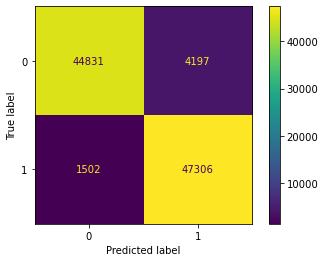

In [58]:
# Matriz de confusão
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(modelo_balanced_tunning_1, X_train_balanc, y_train_balanc)